# Import

In [1]:
from keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score, classification_report

import numpy as np
import matplotlib.pyplot as plt

import pickle
import os
os.chdir('..')

from common.functions import softmax
from common.util import plot_image, plot_value_array, plot_image_grid

Using TensorFlow backend.


# Load model

In [2]:
with open('./Project/final_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load data

.npy file이 주어지면, Project/test file에 넣어두기

## Test file

In [3]:
x_comp = np.load('./Project/test file/testdata1/x_test.npy')
t_comp = np.load('./Project/test file/testdata1/t_test.npy')

x_comp = x_comp.astype(np.float32)
x_comp = (x_comp - x_comp.mean()) / x_comp.std()

model.accuracy(x_comp, t_comp)

0.86

In [4]:
x_comp = np.load('./Project/test file/testdata2/x_test.npy')
t_comp = np.load('./Project/test file/testdata2/t_test.npy')

x_comp = x_comp.astype(np.float32)
x_comp = (x_comp - x_comp.mean()) / x_comp.std()

model.accuracy(x_comp, t_comp)

0.9

## keras file

In [5]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

x_test = x_test.astype(np.float32).reshape(x_test.shape[0], -1)
x_test = (x_test - x_comp.mean()) / x_test.std()

model.accuracy(x_test, t_test)

0.8019

In [6]:
x_pred = model.predict(x_test).argmax(axis=1)
x_pred

array([9, 2, 1, ..., 8, 1, 8], dtype=int64)

In [7]:
print("Accuracy:", accuracy_score(x_pred, t_test))
print("CR:", classification_report(x_pred, t_test))

Accuracy: 0.8019
CR:               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1293
           1       0.98      0.96      0.97      1015
           2       0.55      0.83      0.66       658
           3       0.69      0.97      0.81       713
           4       0.94      0.54      0.69      1739
           5       0.76      1.00      0.86       758
           6       0.40      0.70      0.51       568
           7       0.84      0.93      0.88       906
           8       0.98      0.85      0.91      1144
           9       0.98      0.82      0.89      1206

    accuracy                           0.80     10000
   macro avg       0.80      0.83      0.80     10000
weighted avg       0.85      0.80      0.81     10000



In [8]:
model.params

{'W1': array([[ 8.02253612e-02,  2.54916435e-02,  1.26705712e-01, ...,
          7.92664277e-02,  4.40197920e-02, -5.99399902e-02],
        [ 1.06424878e-01,  9.87479753e-03,  1.19259488e-01, ...,
          1.39770211e-02,  1.05858173e-01, -4.52843021e-02],
        [ 5.03756702e-02,  2.27142431e-02,  8.59692660e-02, ...,
          2.09124723e-02,  9.02510807e-02,  1.53656721e-02],
        ...,
        [-5.11516975e-02, -3.11239806e-02,  1.16972284e-01, ...,
         -8.03849762e-02,  1.28882783e-01, -3.56281227e-01],
        [-2.32797309e-02, -4.44478238e-05,  7.72644003e-02, ...,
         -4.87912805e-02,  1.31267604e-01, -4.10157363e-02],
        [-6.95745107e-03,  1.03155806e-02,  1.39067688e-01, ...,
         -2.43764321e-02,  1.14153041e-01, -1.79368237e-02]]),
 'b1': array([-7.58091350e-02, -3.80231766e-02, -1.31287086e-01, -1.22671150e-01,
         1.54581961e-01, -1.05913939e-01, -7.34857581e-02, -1.03287032e-01,
        -1.57251783e-02, -9.45322814e-02,  7.92589351e-02, -1.800

In [9]:
pred = model.predict(x_test)
pred_proba = softmax(pred)

In [10]:
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

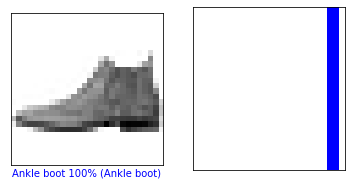

In [11]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, pred_proba, t_test, x_test, CLASS_NAMES)
plt.subplot(1, 2, 2)
plot_value_array(i, pred_proba,  t_test)

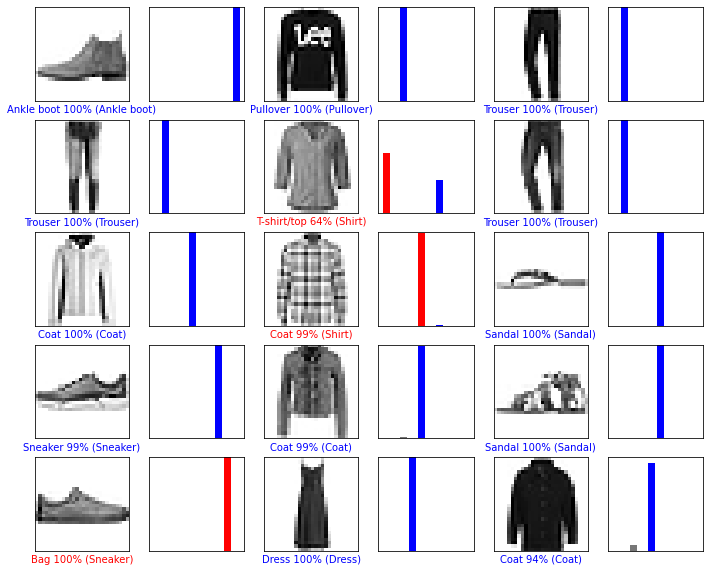

In [12]:
plot_image_grid(x_test, t_test, pred_proba, CLASS_NAMES)